# Week 12 Homework - Imputing Data

Each XLS or XLSX file contains a dataframe.  
* Load each XLS or XLSX file in your Jupyter notebook.  For each dataframe, address missing values by taking the following steps:

1. Count the number of missing values in the dataframe; count the number of missing values per column
1. Plot the distribution of data points using a histogram
1. Create a lag plot (a lag plot shows t versus t+1)
1. Based on the lag plot, state in a markdown cell whether the order of this data matters. 
1. Do one of the following (not both):
    1. If the order of the data matters, then interpolate the missing values
    1. If the order of the data does not matter, fill in the missing data by sampling from the distribution
    1. Create a scatter plot using the columns in dataframe; no Nan entries should be present Submit a single Jupyter notebook with your analysis of the XLS and XLSX files.
    1. Perform interpolation or sampling programmatically using Python (not manually)

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#!pip install --upgrade xlrd

In [4]:
df1 = pd.read_excel('imputation_homework_12.xlsx')
df2 = pd.read_excel('imputation_homework_32.xls')
df3 = pd.read_excel('imputation_homework_78.xlsx')

In [5]:
df1.drop(columns= 'Unnamed: 0', inplace= True)

In [6]:
df1.head()

,x,y
0,1.40,10.00
1,1.45,10.25
2,1.50,10.50
3,1.55,10.75
4,1.60,11.00


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       99 non-null     float64
 1   y       108 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [8]:
df2.drop(columns= 'Unnamed: 0', inplace= True)

In [9]:
df2.head()

,time,value
0,0.00,0.000000
1,0.02,2.528779
2,0.04,2.419020
3,0.06,0.665052
4,0.08,0.506655


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    500 non-null    float64
 1   value   452 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [11]:
df3.drop(columns= 'Unnamed: 0', inplace= True)

In [12]:
df3.head()

,date,value
0,2015-11-03,13.394304
1,2015-11-04,-3.800715
2,2015-11-05,28.098152
3,2015-11-06,20.500562
4,2015-11-07,33.981955


In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    852 non-null    datetime64[ns]
 1   value   771 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.4 KB


#### 1. Count the number of missing values in the dataframe; count the number of missing values per column

In [14]:
df1.isna().sum()

x    9
y    0
dtype: int64

In [15]:
df2.isna().sum()

time      0
value    48
dtype: int64

In [16]:
df3.isna().sum()

date      0
value    81
dtype: int64

In [17]:
# df1.dropna(inplace=True)
# df2.dropna(inplace=True)
# df3.dropna(inplace=True)

#### 2. Plot the distribution of data points using a histogram


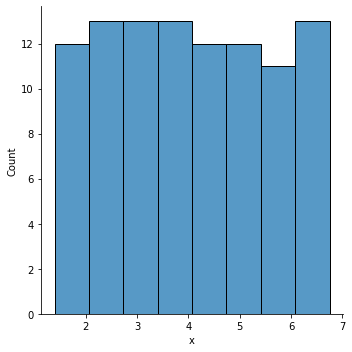

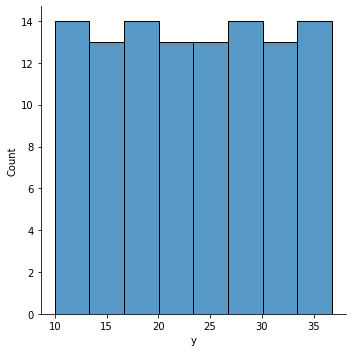

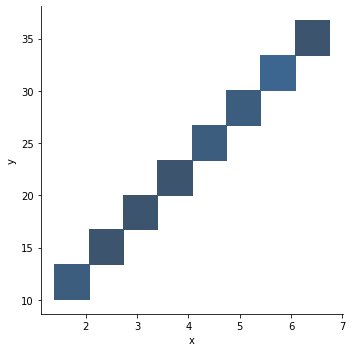

In [18]:
plot = sns.displot(data = df1, x = 'x', kind = 'hist')
plot1 = sns.displot(data = df1, x = 'y', kind = 'hist')
plot2 = sns.displot(data = df1, x = 'x', y = 'y', kind = 'hist')

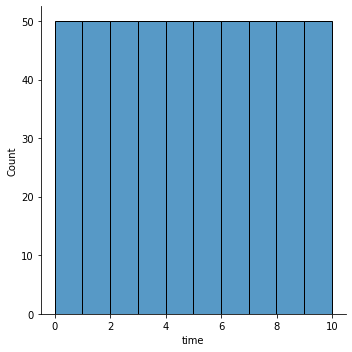

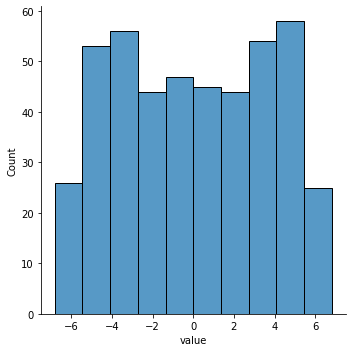

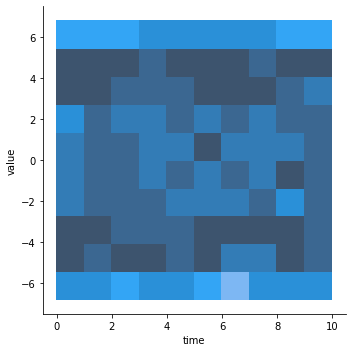

In [19]:
plot = sns.displot(data = df2, x = 'time', kind = 'hist')
plot1 = sns.displot(data = df2, x = 'value', kind = 'hist')
plot2 = sns.displot(data = df2, x = 'time', y = 'value', kind = 'hist')

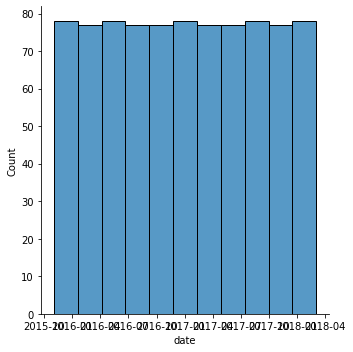

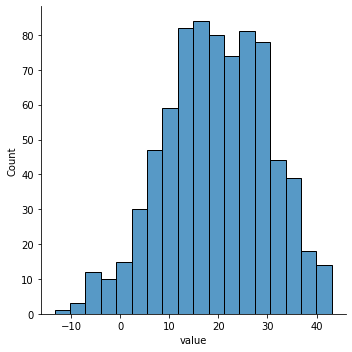

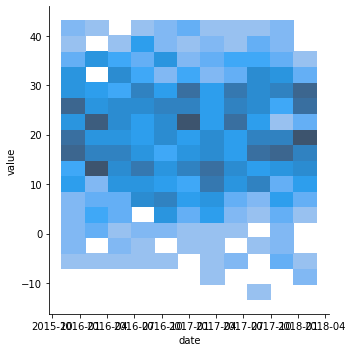

In [20]:
plot = sns.displot(data = df3, x = 'date', kind = 'hist')
plot1 = sns.displot(data = df3, x = 'value', kind = 'hist')
plot2 = sns.displot(data = df3, x = 'date', y = 'value', kind = 'hist')

#### 3. Create a lag plot (a lag plot shows t versus t+1)

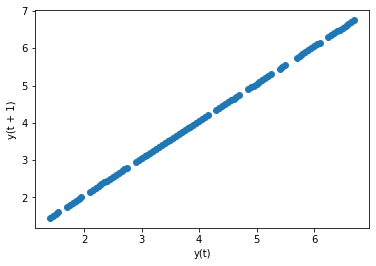

In [21]:
pd.plotting.lag_plot(df1['x']);

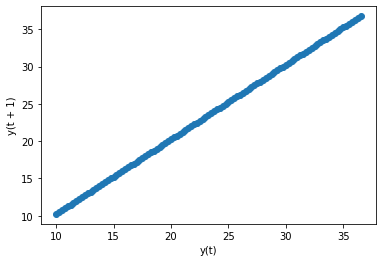

In [22]:
pd.plotting.lag_plot(df1['y']);

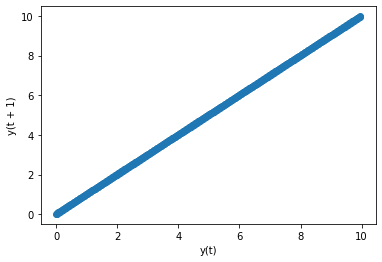

In [23]:
pd.plotting.lag_plot(df2['time']);

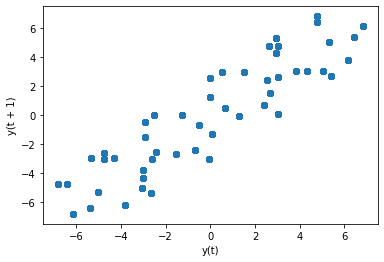

In [24]:
pd.plotting.lag_plot(df2['value']);

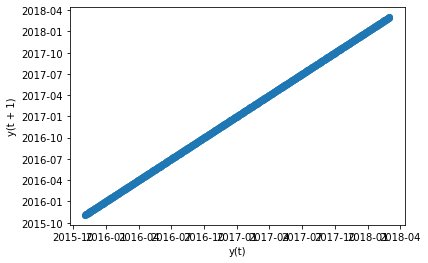

In [25]:
pd.plotting.lag_plot(df3['date']);

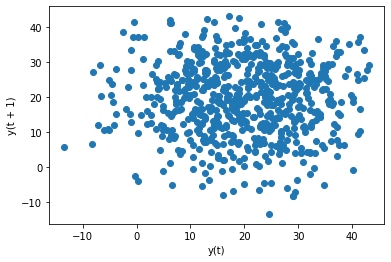

In [26]:
pd.plotting.lag_plot(df3['value']);

#### 4. Based on the lag plot, state in a markdown cell whether the order of this data matters.

=> For all the datasets - df1, df2, and df3 - the order matters as there are no circular blobs in the lag plot of cloumns of df1['x'], df1['y'], df2['time'], df3['date']
=> The only columns with scattered distribution are df2['value'] and df3['value']

#### 5. Do one of the following (not both):
        1. If the order of the data matters, then interpolate the missing values
        2. If the order of the data does not matter, fill in the missing data by sampling from the distribution
        3. Create a scatter plot using the columns in dataframe; no Nan entries should be present Submit a single Jupyter notebook with your analysis of the XLS and XLSX files.
        4. Perform interpolation or sampling programmatically using Python (not manually)


In [27]:
df1.interpolate(inplace=True)

In [28]:
df2.fillna(df2['value'].mean(), inplace=True)

In [29]:
df3.fillna(df3['value'].mean(), inplace=True)

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       108 non-null    float64
 1   y       108 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    500 non-null    float64
 1   value   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [32]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    852 non-null    datetime64[ns]
 1   value   852 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.4 KB
